In [8]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))
sys.path.append(os.path.abspath(os.path.join('../..')))

In [9]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
model_name = 'lpn_mrs_h_30_k_3_n_(0.001_0.1)'
prior = pd.read_csv(f'../savings/{model_name}/prior.csv')
p_0 = np.mean(prior['gaussian_0'].values)
p_1 = np.mean(prior['gaussian_0.01'].values)

prior_normalized = prior.copy()
prior_normalized = (prior_normalized - p_0) / (p_1 - p_0)

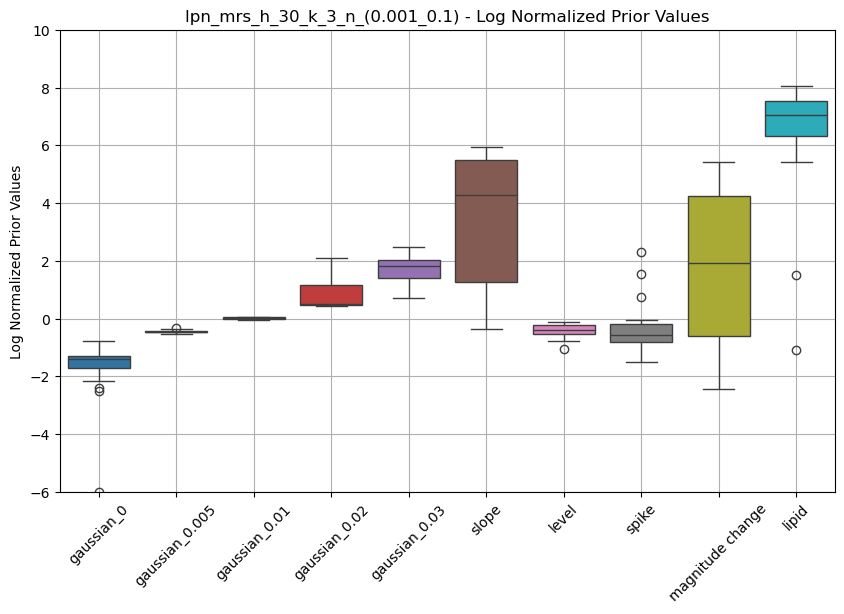

In [11]:
min_normalized_prior = prior_normalized['gaussian_0'].values.min()
plt.figure(figsize=(10, 6))
sns.boxplot(data=np.log10(prior_normalized + abs(min_normalized_prior)+1e-6))
plt.title(f'{model_name} - Log Normalized Prior Values')
plt.ylabel('Log Normalized Prior Values')
plt.ylim((-6,10))
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig(f'../savings/{model_name}/prior.pdf', format='pdf')
plt.show()